# Components analysis of worm locomotion

## Part 1: Jupyter setup and load data

In [1]:
# setup jupyter enviornment and load data
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import os

In [2]:
# update the fig default setup
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 16,
         'axes.titlesize':'x-large',
         'xtick.labelsize':12,
         'ytick.labelsize':12}
pylab.rcParams.update(params)
# other method to control fig sepearatly
plt.rc('font', size=14) 
plt.rc('legend', fontsize=12)


In [3]:
# the code location
print(os.path.abspath('.'))

/Users/jliu0061/PycharmProjects/tracking_analysis/locomotion analysis


In [4]:
# choose the datafold for analysis
source_path =  './D1/'

In [5]:
csvFile = os.listdir(source_path)
print(csvFile)

['D1-1-7.csv', 'D1-1-5.csv', 'D1-1-4.csv', 'D1-3-2.csv', 'D1-1-1.csv', 'D1-3-1.csv', 'D1-1-3.csv', 'D1-1-2.csv', 'D1-2-6.csv', 'D1-4-3.csv', 'D1-2-5.csv', 'D1-2-1.csv', 'D1-2-2.csv', 'D1-2-3.csv', 'D1-2-9.csv', 'D1-1-8.csv']


In [6]:
# check data number
print(len(csvFile))

16


## Part 2: PCA analysis

### Part 2.1 UDF for PCA analysis

In [7]:
# build six dataframes to save the analysis result

component_1 = pd.DataFrame()
component_2 = pd.DataFrame()
component_3 = pd.DataFrame()
component_4 = pd.DataFrame()
component_percentage = pd.DataFrame()
component_per_accumulate = pd.DataFrame()

In [8]:
# PCA analysis

for single_file in csvFile:
    '''Be careful, do not repeat this step, otherwise it will generate error. 
    If the error is generated, you should check the print(len(cvsFile)). If the number
    is higher than the CSV file number, it means there are some analysis result in the folder. 
    In that case, you should go to the fold, completely delete the folder, then regenerate the folder and copy data to the folder'''
    try:
        df = pd.read_csv(os.path.join(source_path,single_file), sep=',', skiprows=4)
        df = df.fillna(df.mean())
        df1 = df.T
        df1 = df1.drop(['Frame', 'Time'], axis = 0)
        pca = PCA(n_components = 10)
        df2 = pca.fit_transform(df1)
        result = pd.DataFrame(df2)
        result.head()
        component_1['{}'.format(single_file)] = result.iloc[:,0]
        component_2['{}'.format(single_file)] = result.iloc[:,1]
        component_3['{}'.format(single_file)] = result.iloc[:,2]
        component_4['{}'.format(single_file)] = result.iloc[:,3]
        result.to_excel('./L1/{}_component.xlsx'.format(single_file))
        component_percentage_single = pd.DataFrame(pca.explained_variance_ratio_, columns = ['{}'.format(single_file)])
        component_percentage['{}'.format(single_file)] = component_percentage_single['{}'.format(single_file)]
        component_percentage_single['Component_accu'] = component_percentage_single.cumsum()
        component_per_accumulate['{}'.format(single_file)] = component_percentage_single['Component_accu']
    except ValueError:
        print("Please check the fold, make sure that data analysis had not been conducted before")
        print("If the dataset had been analyzed, you can repeat analysis after the analsyis data is deleted or removed.")
        break
    
    
component_percentage.to_excel('./L1/component.xlsx')
component_per_accumulate.to_excel('./L1/component_accumulation.xlsx')
    #component_percentage = pd.DataFrame(pca.explained_variance_ratio_, columns = ['Component_percent'])
    #component_percentage['Component_accu'] = component_percentage['Component_percent'].cumsum()
    #component_percentage.to_excel('./L1/{}component.xlsx'.format(single_file))

In [9]:
# show component shapes

def component_display(df):
    len_records = df.shape[1]
    fig_col = 4
  
    if (len_records % fig_col) == 0:
        fig_row = len_records // fig_col
    else:
        fig_row = 1 + (len_records // fig_col)
  
    fig, axss = plt.subplots(fig_row, fig_col, figsize = [25, 20])
    plt.title(label = 'title')
    #fig.suptitle('The distribution of numerical features', fontsize = 24)
    fig_col_start, fig_col_end = 0, 0
    for row in range(fig_row):
        fig_col_start = 0 + fig_col_end
        fig_col_end = fig_col_start + fig_col
        for col in range(fig_col):
            idx = fig_col_start + col
            sns.lineplot(data = df.iloc[:, idx], ax=axss[row][col])


### Part 2.2: Component shape

In [10]:
# UDF for shape correction

def left_right_reverse(df, cols):
    cols = cols.split(",")
    if cols == [""]:
        print("no input")
        return
    print("\nYou are modifing the columns:D1-1-3.csv,D1-2-9.csv")
    print(cols)
    for col in cols:
        left, right = 0, df.shape[0]-1
        col_name = "'" + col + "'"
        while left < right:
            df[col][left], df[col][right] = df[col][right], df[col][left]
            left += 1
            right -= 1

def up_down_reverse(df, cols):
    cols = cols.split(",")
    if cols == [""]:
        print("no input")
        return
    print("\nYou are modifing the columns:")
    print(cols)
    for col in cols:
        df[col] *= -1

#### Part 2.2.1: Component 1 shape

In [11]:
component_1.shape

(25, 16)

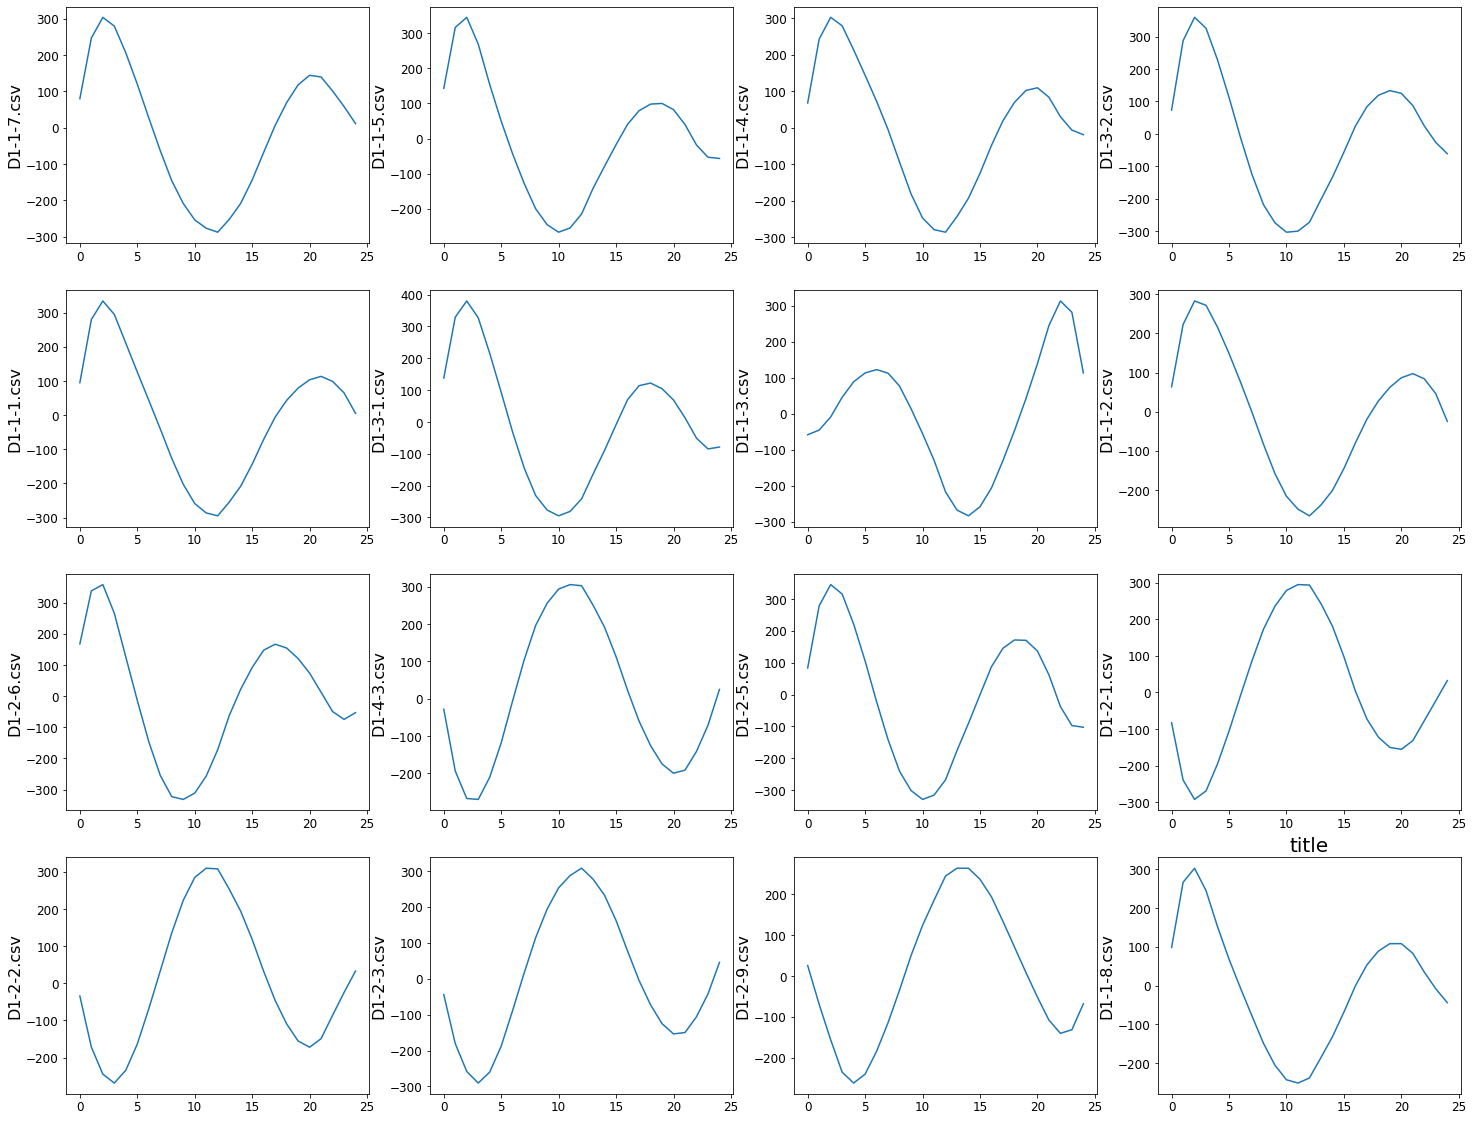

In [12]:
component_display(component_1)

In [13]:
print("Please input the col needed left right reverse:D1-1-3.csv,D1-2-9.csv")
print("Please note some cols have to be left_right_reverse and up_down_reverse, please not there should have no space between two files.")
print("If not, please enter directly.")
left_right_reverse_idx = input() 

left_right_reverse(component_1, left_right_reverse_idx)

Please input the col needed left right reverse:D1-1-3.csv,D1-2-9.csv
Please note some cols have to be left_right_reverse and up_down_reverse, please not there should have no space between two files.
If not, please enter directly.
D1-1-3.csv,D1-2-9.csv

You are modifing the columns:D1-1-3.csv,D1-2-9.csv
['D1-1-3.csv', 'D1-2-9.csv']


In [14]:
print("Please input the col needed up down reverse:D1-2-2.csv,D1-2-3.csv,D1-2-9.csv,D1-4-3.csv,D1-2-1.csv")
print("If not, please enter directly.")
up_down_reverse_idx = input() 

up_down_reverse(component_1, up_down_reverse_idx)

Please input the col needed up down reverse:D1-2-2.csv,D1-2-3.csv,D1-2-9.csv,D1-4-3.csv,D1-2-1.csv
If not, please enter directly.
D1-2-2.csv,D1-2-3.csv,D1-2-9.csv,D1-4-3.csv,D1-2-1.csv

You are modifing the columns:
['D1-2-2.csv', 'D1-2-3.csv', 'D1-2-9.csv', 'D1-4-3.csv', 'D1-2-1.csv']


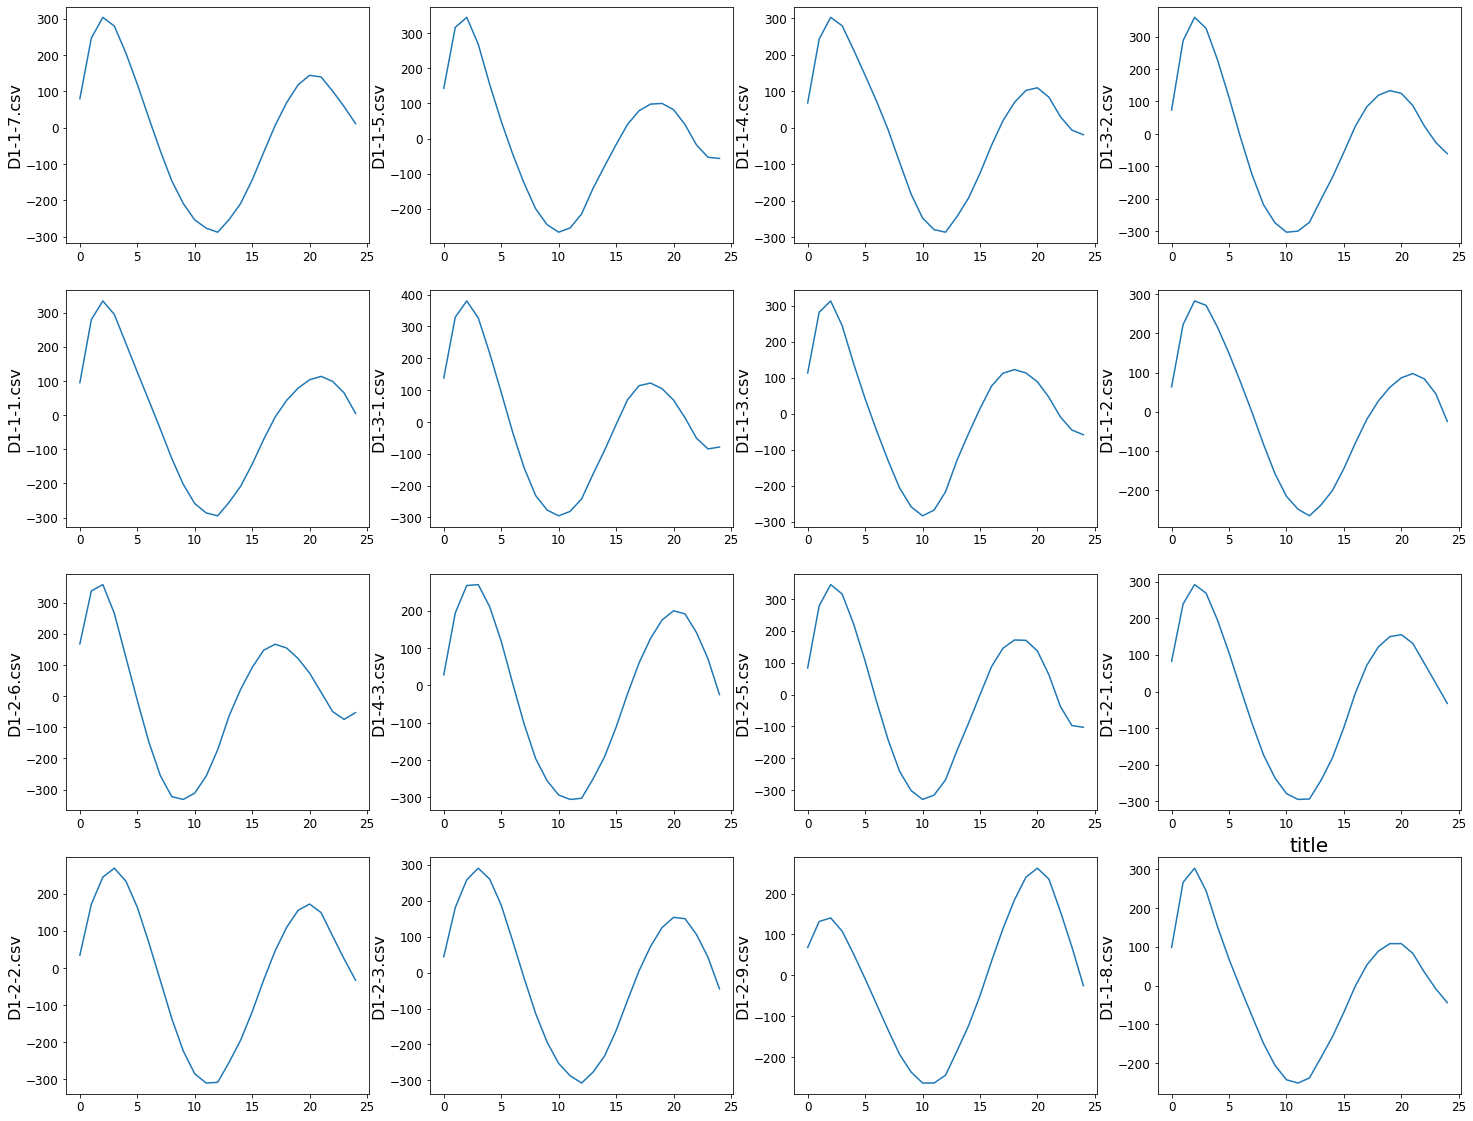

In [15]:
component_display(component_1)

#### Part 2.2.2: Component 2 shape

In [16]:
component_2.shape

(25, 16)

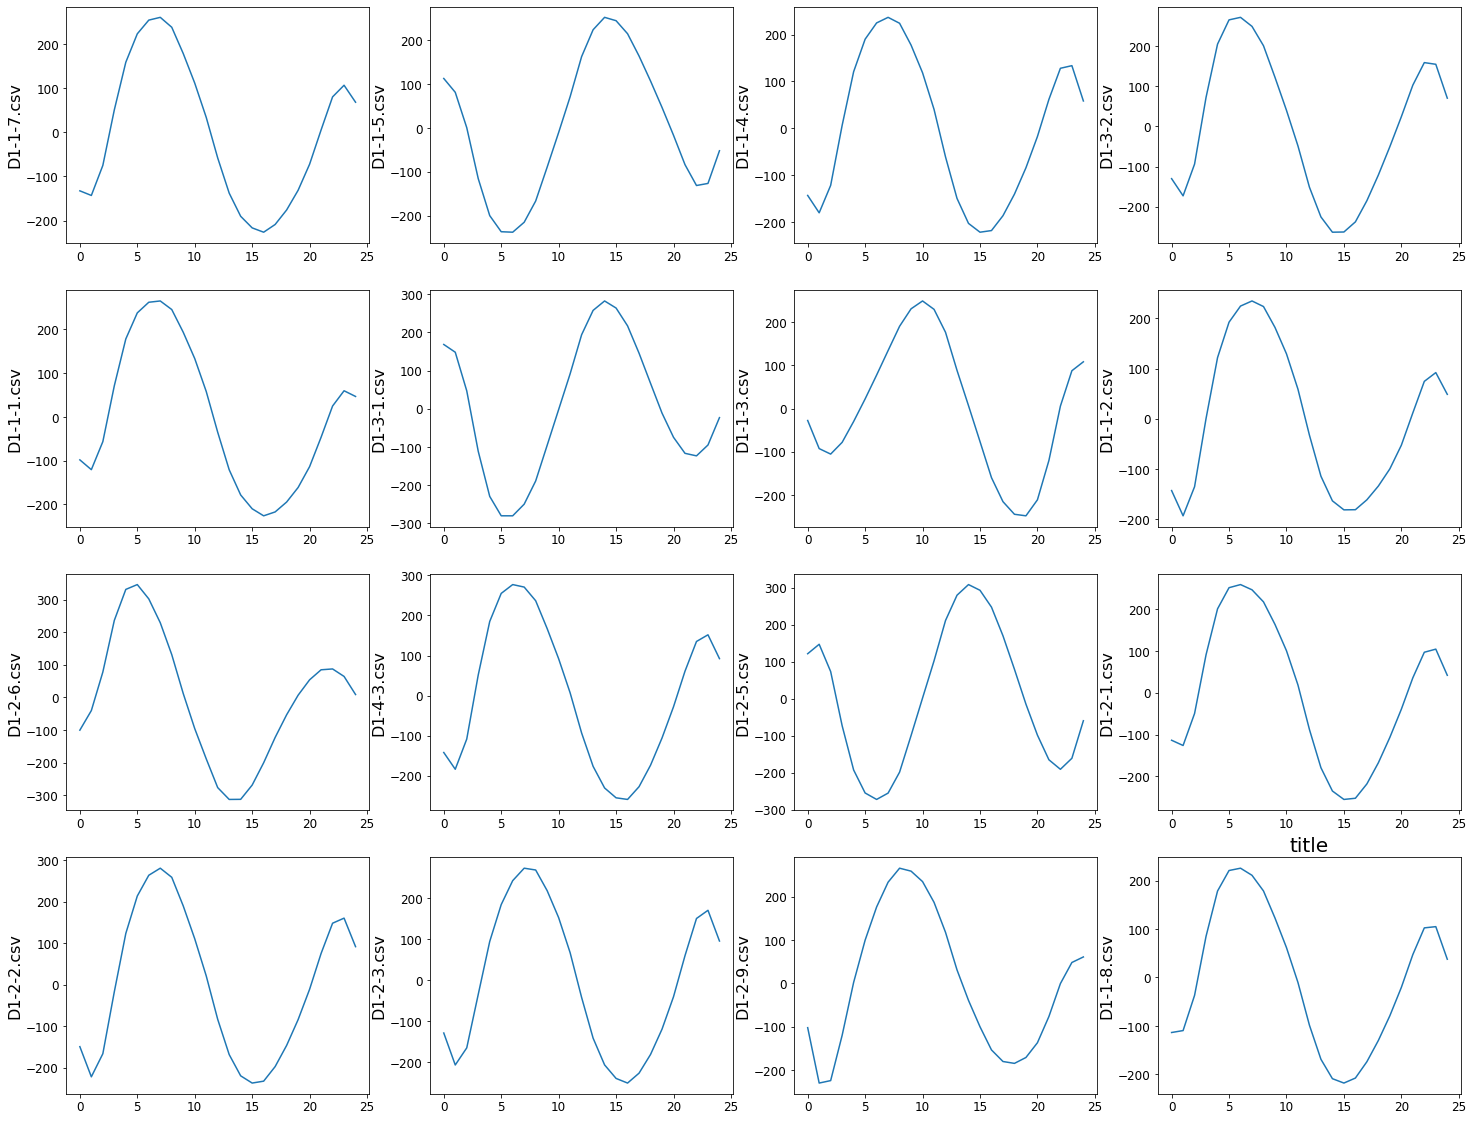

In [17]:
component_display(component_2)

In [18]:
print("Please input the col needed left right reverse: D1-1-3.csv")
print("Please note some cols have to be left_right_reverse and up_down_reverse, please not there should have no space between two files.")
print("If not, please enter directly.")
left_right_reverse_idx = input() 

left_right_reverse(component_2, left_right_reverse_idx)

Please input the col needed left right reverse: D1-1-3.csv
Please note some cols have to be left_right_reverse and up_down_reverse, please not there should have no space between two files.
If not, please enter directly.
D1-1-3.csv

You are modifing the columns:D1-1-3.csv,D1-2-9.csv
['D1-1-3.csv']


In [19]:
print("Please input the col needed up down reverse:D1-1-3.csv,D1-3-1.csv,D1-1-5.csv,D1-2-5.csv")
print("If not, please enter directly.")
up_down_reverse_idx = input() 

up_down_reverse(component_2, up_down_reverse_idx)

Please input the col needed up down reverse:D1-1-3.csv,D1-3-1.csv,D1-1-5.csv,D1-2-5.csv
If not, please enter directly.
D1-1-3.csv,D1-3-1.csv,D1-1-5.csv,D1-2-5.csv

You are modifing the columns:
['D1-1-3.csv', 'D1-3-1.csv', 'D1-1-5.csv', 'D1-2-5.csv']


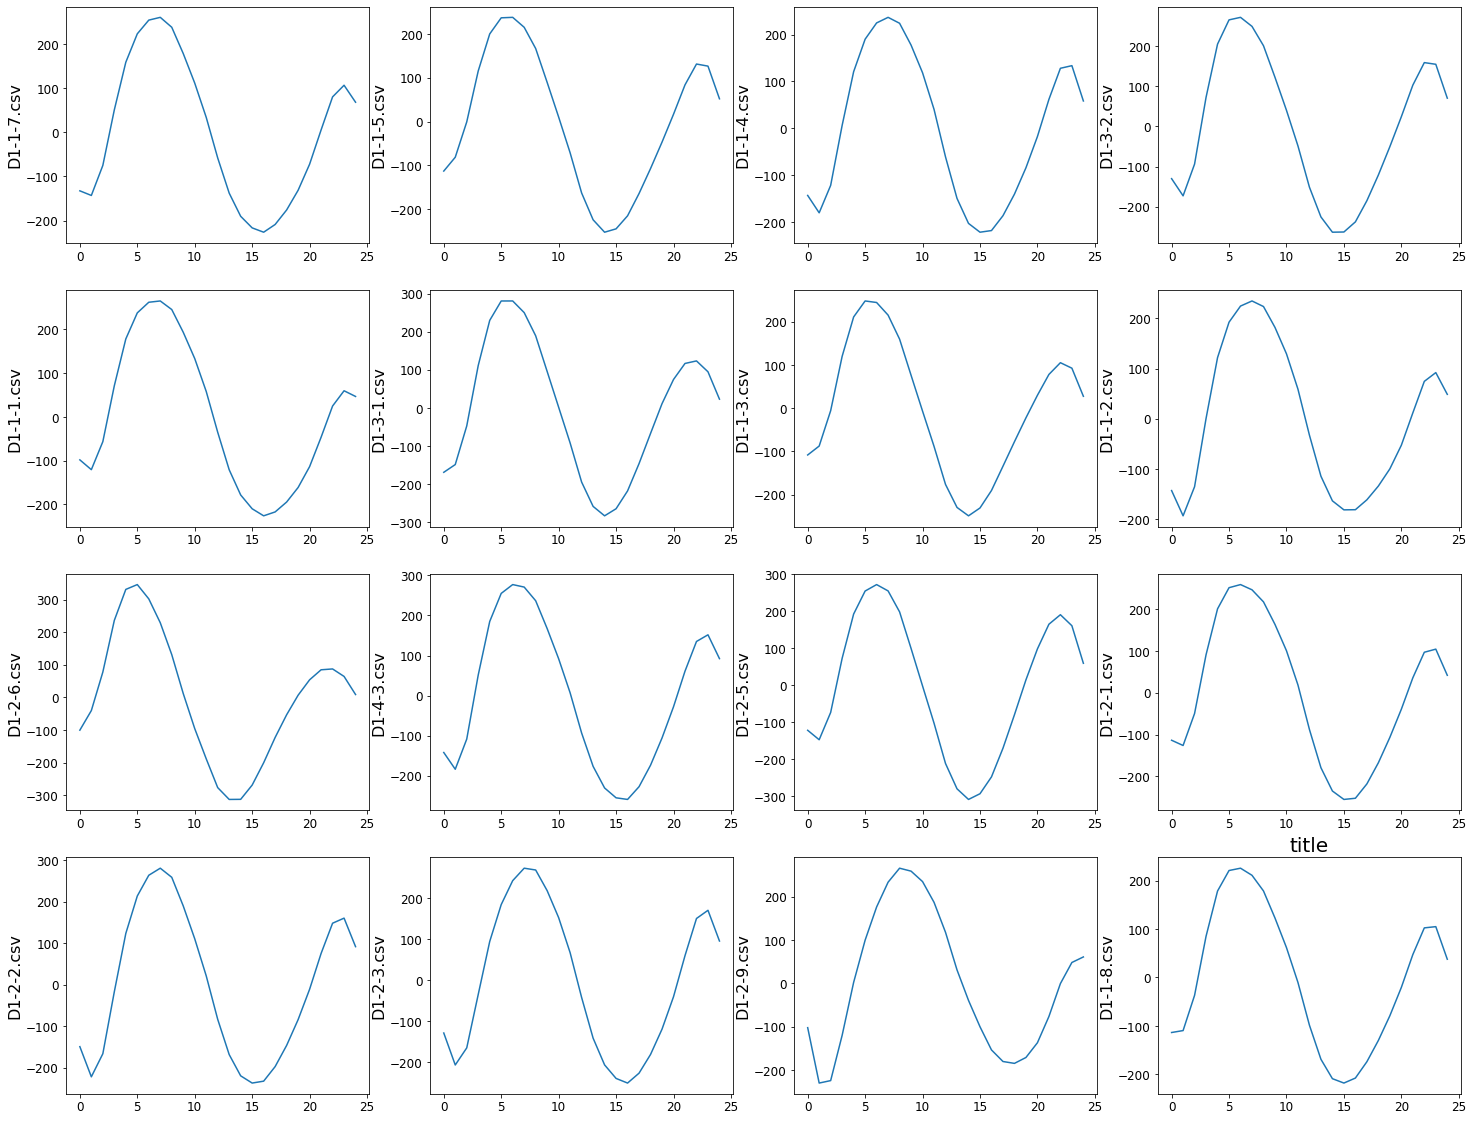

In [20]:
component_display(component_2)

#### Part 2.2.3: Component 3 shape

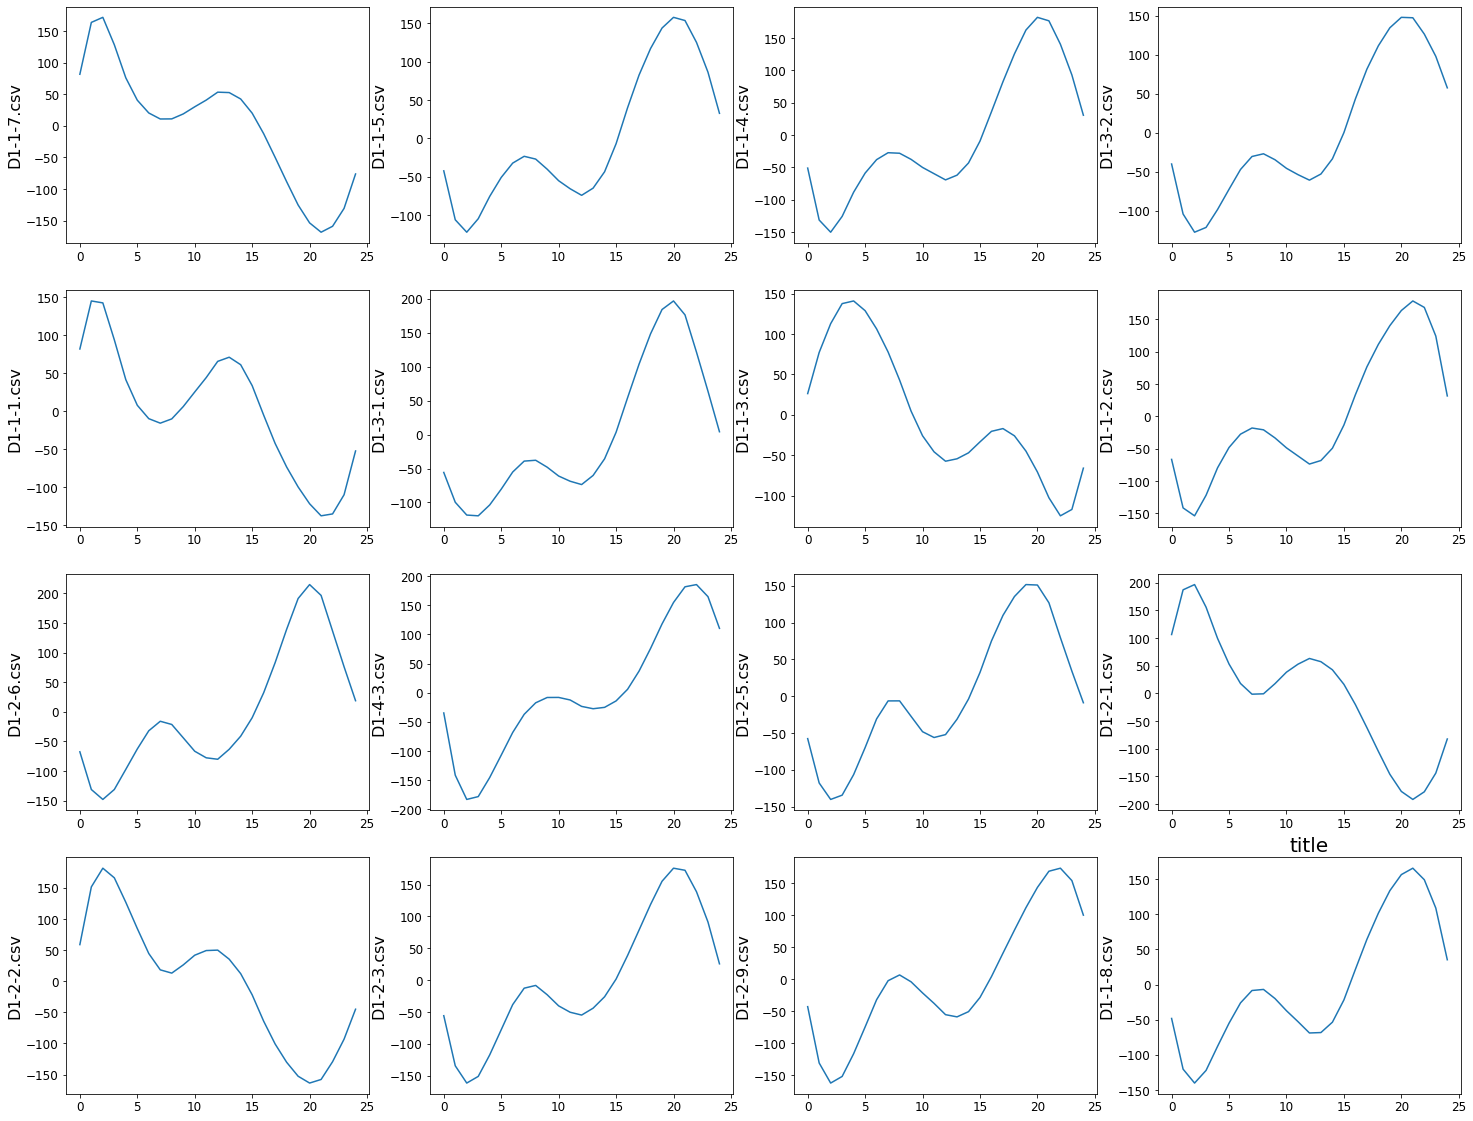

In [21]:
component_3.shape
component_display(component_3)

In [22]:
print("Please input the col needed left right reverse:D1-1-3.csv,D1-4-3.csv,D1-2-9.csv")
print("Please note some cols have to be left_right_reverse and up_down_reverse, please not there should have no space between two files.")
print("If not, please enter directly.")
left_right_reverse_idx = input() 

left_right_reverse(component_3, left_right_reverse_idx)

Please input the col needed left right reverse:D1-1-3.csv,D1-4-3.csv,D1-2-9.csv
Please note some cols have to be left_right_reverse and up_down_reverse, please not there should have no space between two files.
If not, please enter directly.
D1-1-3.csv,D1-4-3.csv,D1-2-9.csv

You are modifing the columns:D1-1-3.csv,D1-2-9.csv
['D1-1-3.csv', 'D1-4-3.csv', 'D1-2-9.csv']


In [23]:
print("Please input the col needed up down reverse:D1-1-5.csv,D1-1-4.csv,D1-3-2.csv,D1-3-1.csv,D1-1-3.csv,D1-1-2.csv,D1-2-6.csv,D1-2-5.csv,D1-2-3.csv,D1-1-8.csv")
print("If not, please enter directly.")
up_down_reverse_idx = input() 

up_down_reverse(component_3, up_down_reverse_idx)

Please input the col needed up down reverse:D1-1-5.csv,D1-1-4.csv,D1-3-2.csv,D1-3-1.csv,D1-1-3.csv,D1-1-2.csv,D1-2-6.csv,D1-2-5.csv,D1-2-3.csv,D1-1-8.csv
If not, please enter directly.
D1-1-5.csv,D1-1-4.csv,D1-3-2.csv,D1-3-1.csv,D1-1-3.csv,D1-1-2.csv,D1-2-6.csv,D1-2-5.csv,D1-2-3.csv,D1-1-8.csv

You are modifing the columns:
['D1-1-5.csv', 'D1-1-4.csv', 'D1-3-2.csv', 'D1-3-1.csv', 'D1-1-3.csv', 'D1-1-2.csv', 'D1-2-6.csv', 'D1-2-5.csv', 'D1-2-3.csv', 'D1-1-8.csv']


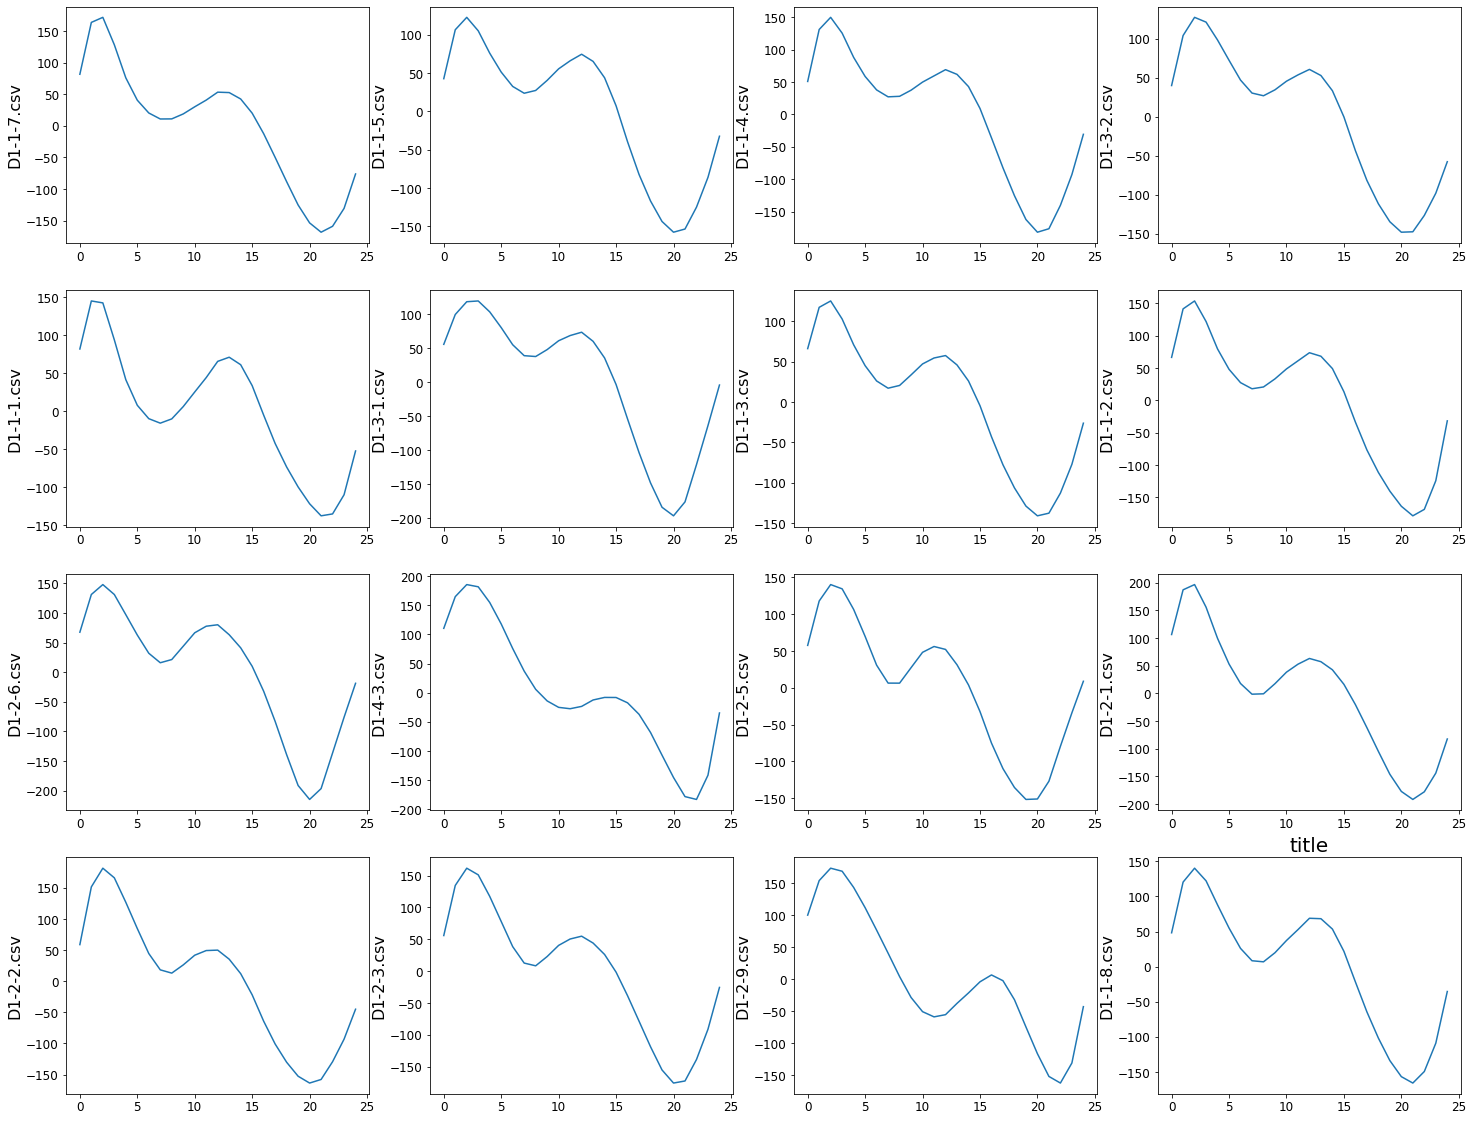

In [24]:
component_display(component_3)

#### Part 2.2.4: Component 4 shape

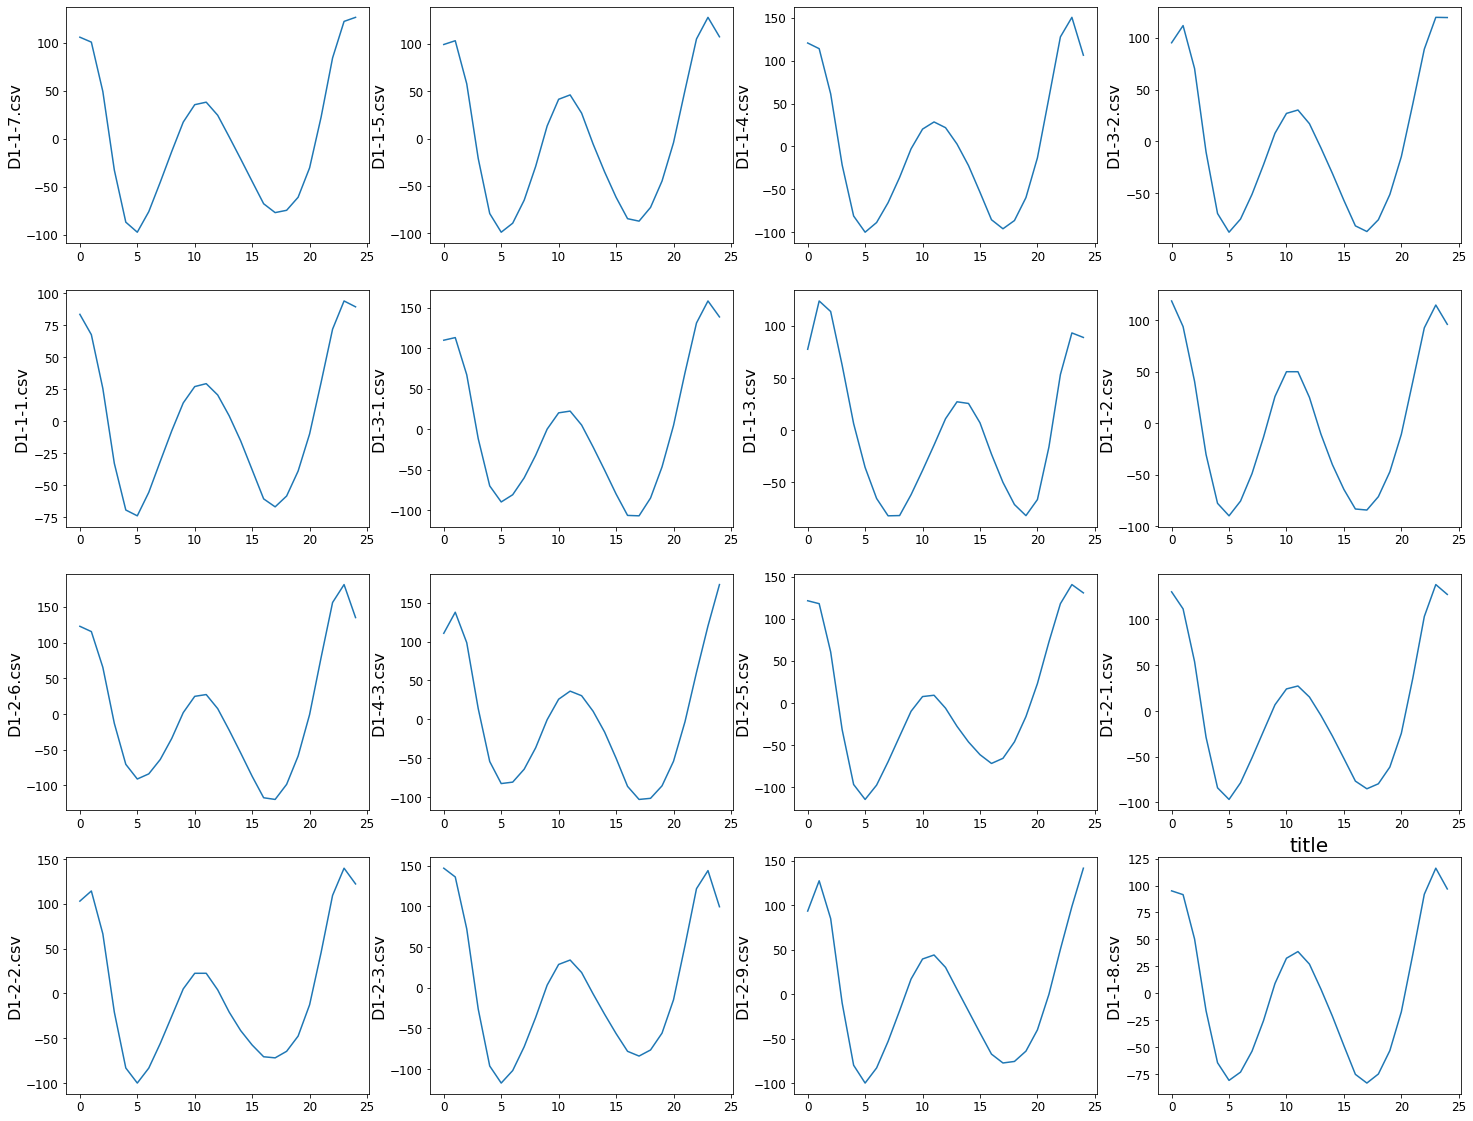

In [25]:
component_4.shape
component_display(component_4)

In [26]:
print("Please input the col needed left right reverse:")
print("Please note some cols have to be left_right_reverse and up_down_reverse, please not there should have no space between two files.")
print("If not, please enter directly.")
left_right_reverse_idx = input() 

left_right_reverse(component_4, left_right_reverse_idx)

Please input the col needed left right reverse:
Please note some cols have to be left_right_reverse and up_down_reverse, please not there should have no space between two files.
If not, please enter directly.

no input


In [27]:
print("Please input the col needed up down reverse:D1-2-2.csv")
print("If not, please enter directly.")
up_down_reverse_idx = input() 

up_down_reverse(component_4, up_down_reverse_idx)

Please input the col needed up down reverse:D1-2-2.csv
If not, please enter directly.

no input


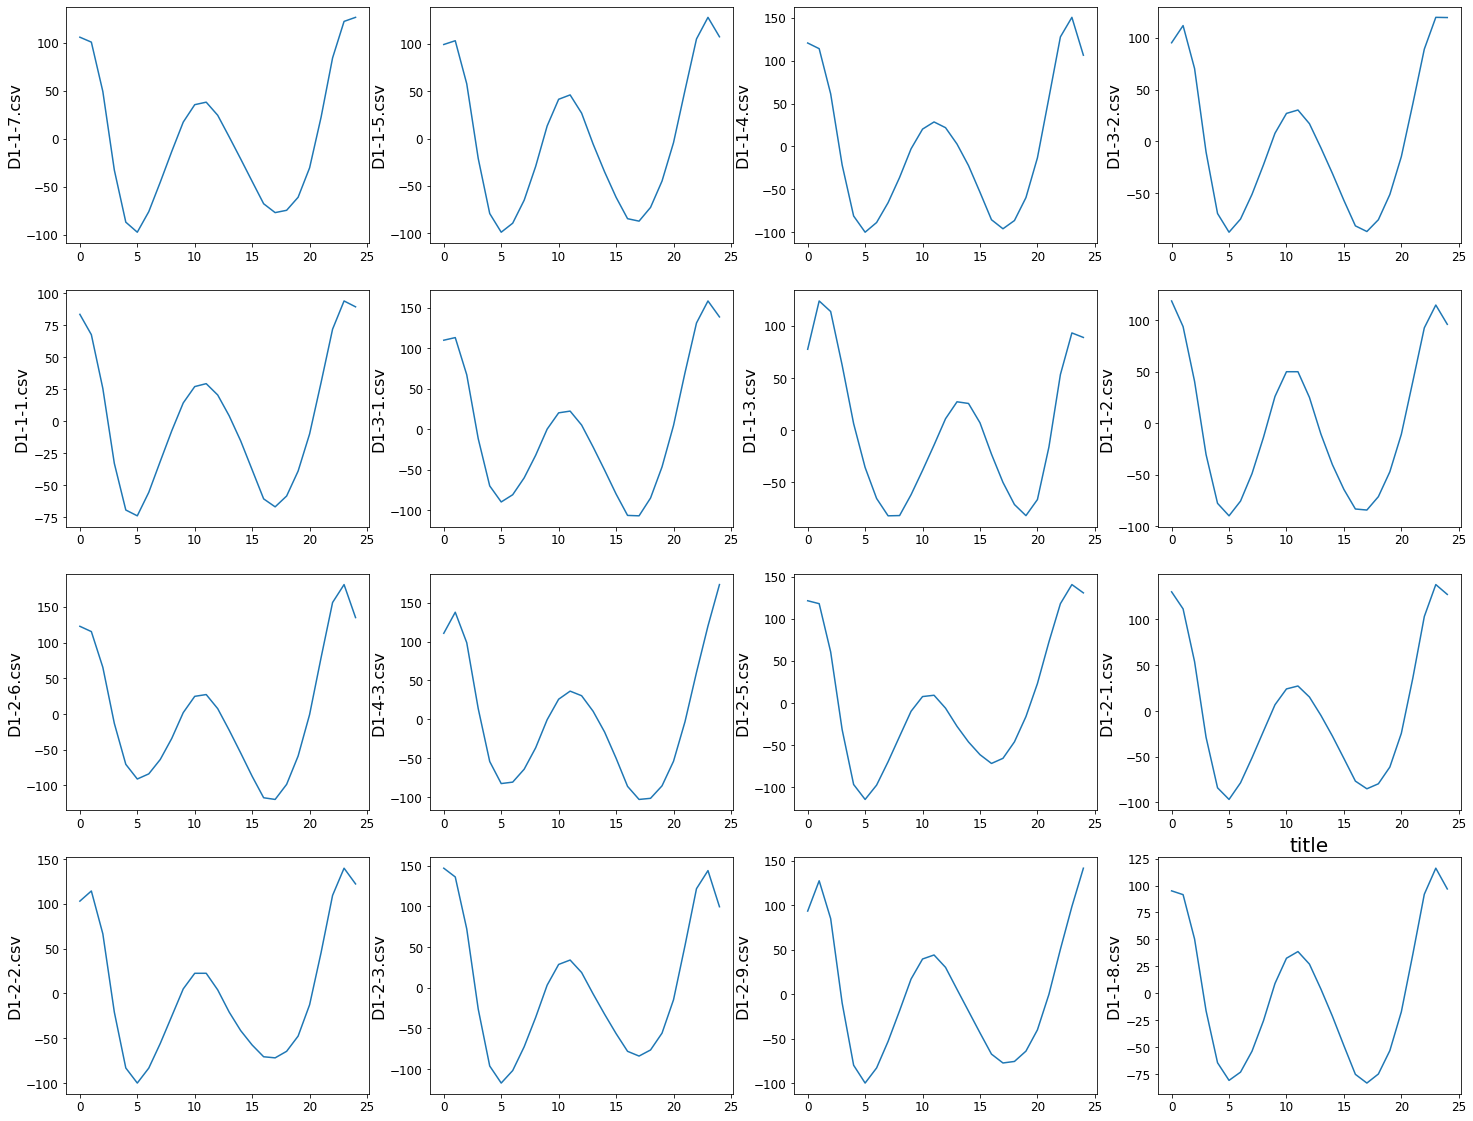

In [28]:
component_display(component_4)

### Part 2.3: Component shapes

In [29]:
component_1

,D1-1-7.csv,D1-1-5.csv,D1-1-4.csv,D1-3-2.csv,D1-1-1.csv,D1-3-1.csv,D1-1-3.csv,D1-1-2.csv,D1-2-6.csv,D1-4-3.csv,D1-2-5.csv,D1-2-1.csv,D1-2-2.csv,D1-2-3.csv,D1-2-9.csv,D1-1-8.csv
0,79.696600,142.909906,67.526995,73.781713,95.042774,138.013601,113.390521,63.528229,167.922035,28.302318,83.582565,82.545227,34.302370,44.340015,68.080980,98.515396
1,246.692254,316.233751,242.390163,287.415031,279.893671,329.215176,282.028885,222.715788,338.092005,193.819665,278.699686,238.858464,171.415733,180.750384,131.615982,266.467795
2,303.720840,344.878770,301.945970,359.418939,334.369686,380.176609,313.516982,282.996651,358.365420,267.501020,345.462632,291.943277,244.299669,258.320639,140.311344,303.016861
3,279.672056,268.757741,278.919055,325.654809,294.944972,327.318556,244.999874,271.831362,266.073563,270.041722,315.797654,268.582930,268.287845,290.608195,107.948709,244.959871
4,206.052331,153.798259,212.936921,227.981830,210.783520,215.659757,139.205052,215.766073,125.613016,210.623919,221.602713,194.718652,233.816801,260.048377,51.877129,151.934026
5,119.722110,49.426592,143.252332,112.548076,126.194899,93.046560,41.860809,148.724523,-13.461736,118.240582,105.475333,105.575717,163.387384,187.765262,-8.253102,68.217604
6,26.956272,-43.997982,72.155464,-11.279590,43.477622,-32.575200,-47.060505,75.587244,-146.191691,5.149430,-22.401429,8.119542,68.591253,87.849892,-70.796874,-6.604693
7,-63.267217,-127.738861,-5.705027,-125.198422,-40.229014,-144.350292,-130.170721,-1.578394,-254.401032,-104.004358,-141.878980,-86.665168,-33.296069,-16.051104,-133.298188,-78.384538
8,-146.132883,-199.765626,-94.650136,-218.294303,-126.665493,-231.140016,-206.399763,-83.230930,-322.583046,-196.216051,-241.158194,-172.796095,-135.699734,-114.198973,-193.074356,-148.975208
9,-208.607997,-245.029530,-181.609377,-274.148026,-202.490383,-276.658626,-258.624245,-158.430086,-331.536915,-255.733438,-301.499624,-235.874802,-223.187377,-193.838989,-236.172102,-205.428583


In [30]:
# interge all component avg and std into one dataframe

component_summary = pd.DataFrame()
component_summary['component_1'] = np.mean(component_1, axis = 1)
component_summary['component_1_std'] = np.std(component_1, axis = 1)
component_summary['component_2'] = np.mean(component_2, axis = 1)
component_summary['component_2_std'] = np.std(component_2, axis = 1)
component_summary['component_3'] = np.mean(component_3, axis = 1)
component_summary['component_3_std'] = np.std(component_3, axis = 1)
component_summary['component_4'] = np.mean(component_4, axis = 1)
component_summary['component_4_std'] = np.std(component_4, axis = 1)

component_summary

,component_1,component_1_std,component_2,component_2_std,component_3,component_3_std,component_4,component_4_std
0,86.342578,37.710647,-125.412087,19.477915,68.105883,21.330719,108.330889,17.385045
1,250.394027,56.961232,-149.422609,51.709235,135.613200,23.846500,111.225120,16.912062
2,301.890332,56.197359,-80.005688,71.664239,152.392092,23.261084,64.874416,20.599619
3,270.274932,48.242246,57.190695,77.426846,133.084146,24.320250,-14.460644,22.942782
4,189.526148,50.505834,170.872760,68.959227,97.922887,27.427041,-72.312752,22.950808
5,97.607684,55.390069,231.246241,51.205034,64.782421,26.071393,-90.998762,17.925820
6,0.436172,60.372329,251.152598,28.916712,36.134839,20.609759,-80.517935,10.855790
7,-92.888586,64.144808,245.337601,20.894611,17.983543,14.601547,-58.320330,11.722031
8,-176.936300,59.932502,212.671371,38.808734,14.157837,12.192534,-29.681472,16.332144
9,-236.804381,44.175334,146.655151,60.162440,22.910934,19.965807,2.929262,18.814728


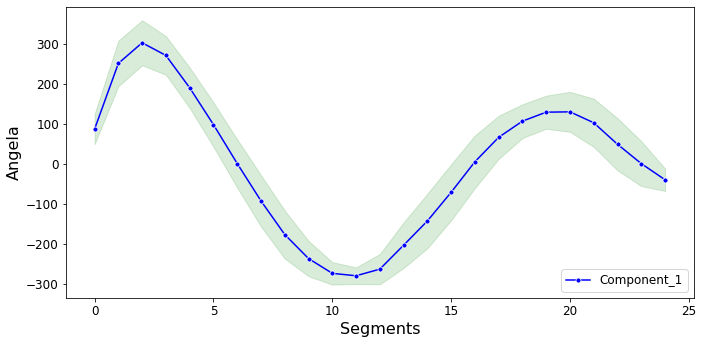

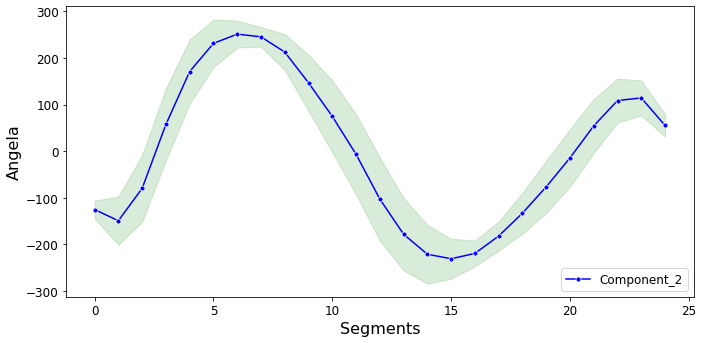

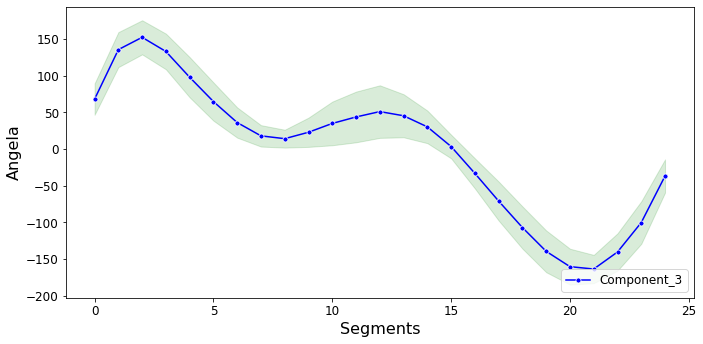

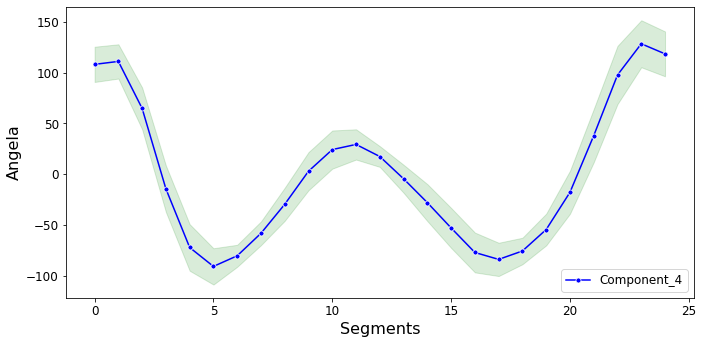

In [31]:
def components_combine(df):
    param_range = [x for x in range(25)]
    idx = 0
    for i in range(2):
        for j in range(2):
            train_size = [x for x in range(df.shape[0])]
            train_mean = df.iloc[:,idx]
            train_std = df.iloc[:,idx+1]
            plt.rcParams["figure.figsize"] = (10,5)
            sns.lineplot(x = train_size, y = train_mean,
                     color='blue', marker='o',
                     markersize=5, label='Component_{}'.format((2+idx)//2))
            plt.fill_between(param_range, 
                             train_mean + train_std,
                             train_mean - train_std, 
                             alpha=0.15, color='green')
            
            plt.xlabel('Segments')
            plt.ylabel('Angela')
            plt.legend(loc='lower right')
            #plt.ylim([-300, 300])
            plt.tight_layout()
            plt.show()
            idx += 2

components_combine(component_summary)

### Part 2.4: Component percentage

In [32]:
# Average of percentage

component_percentage['average'] = component_percentage.mean(axis = 1)
component_per_accumulate['average'] = component_per_accumulate.mean(axis = 1)
component_percentage


,D1-1-7.csv,D1-1-5.csv,D1-1-4.csv,D1-3-2.csv,D1-1-1.csv,D1-3-1.csv,D1-1-3.csv,D1-1-2.csv,D1-2-6.csv,D1-4-3.csv,D1-2-5.csv,D1-2-1.csv,D1-2-2.csv,D1-2-3.csv,D1-2-9.csv,D1-1-8.csv,average
0,0.426137,0.411411,0.398159,0.437486,0.459241,0.405618,0.428365,0.405691,0.383819,0.397359,0.427485,0.389896,0.393336,0.394309,0.391061,0.403258,0.409539
1,0.339586,0.351752,0.326507,0.361691,0.364978,0.339967,0.359219,0.322395,0.370114,0.348509,0.370393,0.334513,0.364089,0.358787,0.358602,0.338075,0.350574
2,0.120810,0.108264,0.129817,0.089797,0.089265,0.108855,0.099799,0.146851,0.108749,0.124764,0.082030,0.145050,0.124743,0.112256,0.134053,0.132437,0.116096
3,0.061826,0.074041,0.081992,0.055270,0.037883,0.072183,0.064801,0.070841,0.076931,0.069022,0.064024,0.065264,0.062465,0.077001,0.068940,0.066068,0.066784
4,0.018230,0.019559,0.025002,0.021644,0.017243,0.029633,0.016466,0.020939,0.024392,0.025564,0.020436,0.024822,0.020853,0.023427,0.019072,0.024754,0.022002
5,0.012840,0.014018,0.016335,0.014577,0.013735,0.021731,0.013169,0.013890,0.015782,0.015958,0.017275,0.019308,0.014273,0.015326,0.014228,0.014694,0.015446
6,0.009699,0.008772,0.009919,0.009418,0.009036,0.011942,0.008809,0.008133,0.012027,0.009719,0.009165,0.011397,0.009956,0.009952,0.007424,0.009361,0.009671
7,0.007011,0.007252,0.007555,0.006320,0.004747,0.006031,0.005208,0.006830,0.005233,0.005415,0.005269,0.005522,0.005821,0.005252,0.004076,0.006826,0.005898
8,0.003853,0.004926,0.004708,0.003792,0.003866,0.004036,0.004158,0.004424,0.002944,0.003682,0.003919,0.004222,0.004460,0.003685,0.002538,0.004518,0.003983
9,0.000008,0.000005,0.000006,0.000005,0.000005,0.000005,0.000006,0.000006,0.000009,0.000006,0.000004,0.000008,0.000005,0.000004,0.000007,0.000008,0.000006


In [33]:
# Average of precentage accumlation

component_per_accumulate

,D1-1-7.csv,D1-1-5.csv,D1-1-4.csv,D1-3-2.csv,D1-1-1.csv,D1-3-1.csv,D1-1-3.csv,D1-1-2.csv,D1-2-6.csv,D1-4-3.csv,D1-2-5.csv,D1-2-1.csv,D1-2-2.csv,D1-2-3.csv,D1-2-9.csv,D1-1-8.csv,average
0,0.426137,0.411411,0.398159,0.437486,0.459241,0.405618,0.428365,0.405691,0.383819,0.397359,0.427485,0.389896,0.393336,0.394309,0.391061,0.403258,0.409539
1,0.765723,0.763163,0.724666,0.799176,0.824220,0.745584,0.787584,0.728086,0.753933,0.745869,0.797878,0.724409,0.757425,0.753096,0.749663,0.741333,0.760113
2,0.886533,0.871427,0.854483,0.888974,0.913485,0.854440,0.887383,0.874938,0.862683,0.870633,0.879908,0.869458,0.882168,0.865352,0.883716,0.873770,0.876209
3,0.948359,0.945468,0.936475,0.944244,0.951368,0.926622,0.952185,0.945778,0.939613,0.939655,0.943933,0.934722,0.944632,0.942353,0.952656,0.939838,0.942994
4,0.966590,0.965027,0.961477,0.965888,0.968610,0.956255,0.968650,0.966717,0.964006,0.965219,0.964368,0.959543,0.965485,0.965781,0.971728,0.964593,0.964996
5,0.979430,0.979045,0.977812,0.980465,0.982345,0.977986,0.981819,0.980606,0.979787,0.981177,0.981643,0.978851,0.979759,0.981106,0.985956,0.979287,0.980442
6,0.989129,0.987817,0.987731,0.989883,0.991382,0.989928,0.990628,0.988739,0.991814,0.990896,0.990808,0.990249,0.989715,0.991058,0.993380,0.988648,0.990113
7,0.996140,0.995069,0.995286,0.996202,0.996129,0.995959,0.995836,0.995569,0.997047,0.996311,0.996078,0.995770,0.995536,0.996310,0.997455,0.995473,0.996011
8,0.999992,0.999995,0.999994,0.999995,0.999995,0.999995,0.999994,0.999994,0.999991,0.999994,0.999996,0.999992,0.999995,0.999996,0.999993,0.999992,0.999994
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 720x360 with 0 Axes>

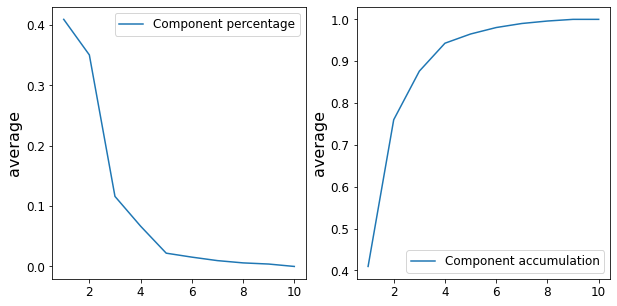

In [34]:
# Fig for component percentage and accumulation

fig = plt.figure()
fig, ax = plt.subplots(1,2, figsize = (10, 5))
plt.subplot(121)
ax1 = sns.lineplot(data = component_percentage, markers = True, x= [x for x in range(1,11)], y = 'average', label = 'Component percentage')
plt.subplot(122)
ax2 = sns.lineplot(data = component_per_accumulate, markers = True, x= [x for x in range(1,11)], y = 'average', label = 'Component accumulation')

## Part 3: Locomotion Pattern

In [35]:
# UDF for analysis

def density_calc(x, y, radius):
    """
    density calculate
    :param x:
    :param y:
    :param radius:
    :return: density
    """
    res = np.empty(len(x), dtype=np.float32)
    #ones, zeros, and empty build empty matrix，empty is the fastest
    for i in range(len(x)):
        res[i] = np.sum((x > (x[i] - radius)) & (x < (x[i] + radius))
                        & (y > (y[i] - radius)) & (y < (y[i] + radius)))
    return res

In [36]:
# load data
url_i = r"/Users/jliu0061/Documents/Jie Document/Monash/Lab/Lab projects/NMJ development/Paper fig/Fig 1. Development Locomotion Zexiong/worm locotion analysis python/YA.csv"
df = pd.read_csv('/Users/jliu0061/Documents/Jie Document/Monash/Lab/Lab projects/NMJ development/Paper fig/Fig 1. Development Locomotion Zexiong/worm locotion analysis python/YA.csv')
savefig_name = r"/Users/jliu0061/Desktop/YA_scatterfig"

In [37]:
# read data
matrix_i = pd.read_csv(url_i).values
sevp_i = matrix_i[:, 0]
estimate_i = matrix_i[:, 1]

In [38]:
print(sevp_i)

[ 32.04280113   9.91011269 -19.33237948 ...          nan   1.76523194
   7.66774741]


In [39]:
# define parameters

radius = 2 
colormap = plt.get_cmap("jet")
marker_size = 5
xrange = [-100, 100]
yrange = [-100, 100]
xticks = np.linspace(-100, 100, 10)
yticks = np.linspace(-100, 100, 10)
xlabel = "Observation"
ylabel_i = "Estimate-1"
cbar_ticks = [10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
font = {'family': 'Times New Roman',
        'weight': 'bold',
        'size': 14}

Text(0.0, 1.0, 'Young Adult')

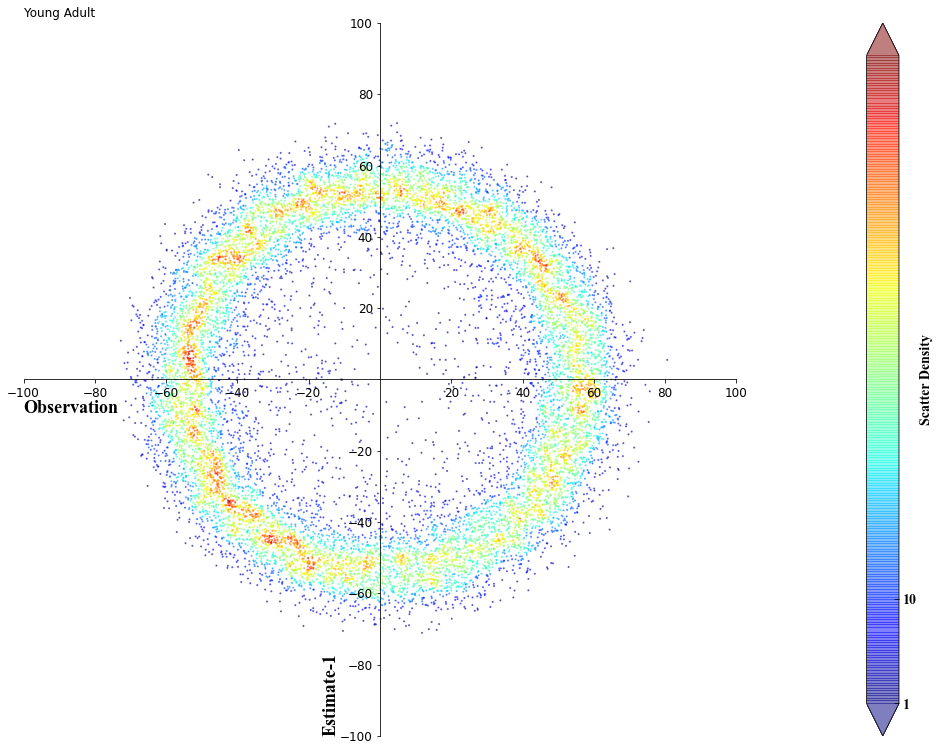

In [40]:
# plot figure

fig = plt.figure(1)
fig.set_size_inches(18.5, 10.5)

plt.subplot(1, 1, 1, aspect="equal")
Z1 = density_calc(sevp_i, estimate_i, radius)
#plt.scatter(sevp_i, estimate_i, c=Z1, cmap=colormap, marker=".", s=marker_size, norm=colors.LogNorm(vmin=Z1.min(), vmax=0.5 * Z1.max()))
plt.scatter(sevp_i, estimate_i, c=Z1, cmap=colormap, marker=".", s=marker_size, alpha=0.5)
plt.xlim(xrange) #x axis limitation
plt.ylim(yrange)
plt.xticks(xticks, fontproperties='Times New Roman', size=100)
plt.yticks(yticks, fontproperties='Times New Roman', size=14)
plt.xlabel(xlabel, fontdict=font, labelpad=0.1, loc='left', size=18)
plt.ylabel(ylabel_i, fontdict=font, labelpad=0.1, loc='bottom', size=18)
#plt.grid(linestyle='--', color="grey")
#plt.plot(xrange, yrange, color="k", linewidth=0.8, linestyle='--')

ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('axes',0.5))
plt.rc('font', **font)
plt.rc('lines', linewidth = 555)
ax.set_xticks([-100, -80, -60, -40, -20, 20, 40, 60, 80, 100])
ax.set_yticks([-100, -80, -60, -40, -20, 20, 40, 60, 80, 100])

# color bar
cbar = plt.colorbar(orientation='vertical', extend="both", pad=0.1)
cbar.set_label("Scatter Density", fontdict=font)
cbar.set_ticks(cbar_ticks)
cbar.ax.tick_params(which="major", direction="in", length=5, labelsize=14)
cbar.ax.tick_params(which="minor", direction="in", length=100, labelsize=10)

# save figure

fig.tight_layout()
plt.savefig(savefig_name, dpi=600)
plt.title("Young Adult", size =12, loc="left")
#plt.legend(loc="upper left")
#plt.text(15,20,"C. elegans", size = 12)
#plt.show()